In [1]:
#Partially based on Fornieri et al (2020) JCAP 02 009- doi:10.1088/1475-7516/2020/02/009

import matplotlib.pyplot as plt
from astropy.io import fits as pyfits
import numpy as np
from matplotlib import rcParams
import sys
from utils_CR import CR

# DATA EXTRACTION

In [14]:
phi_ams = 0.5

def read_fits_pHelep(inpfile):

    print(inpfile)
    hdulist = pyfits.open(inpfile)
    #print(hdulist.info() )
    prihdr = hdulist[0].header  # the primary header
    #print(prihdr)
    ##print(hdulist[1].header)
    n_ext  = len(hdulist)
   
    table_header = hdulist[0].header     # header attribute of TABLE 
    
    zmin   = table_header['zmin']
    zmax   = table_header['zmax']
    rmin   = table_header['rmin']
    rmax   = table_header['rmax']
    izsun  = table_header['izsun']
    irsun  = table_header['irsun']
    dimz   = table_header['dimz']
    dimr   = table_header['dimr']
    robs   = table_header['robs']
    zobs   = table_header['zobs']
    
    rvec = np.linspace(rmin, rmax, dimr)
    zvec = np.linspace(zmin, zmax, dimz)

    emin   = table_header['ekmin']
    ek_fac = table_header['ekin_fac']
    dimE   = table_header['dimE']

    E = [emin*(ek_fac**i) for i in range(0,dimE)]
    E = np.array(E)
    print(rvec[irsun], zvec[izsun], irsun, izsun, dimE, emin, max(E))


    table_H1_P, table_H1_S, table_H2, table_H3 = [], [], [], []
    table_He3, table_He4 = [], []
    table_sec_pos, table_pri_ele, table_sec_ele, table_ext, table_lept = [], [], [], [], []
    for i in range(1,n_ext): #points in the list         

        # H and He    
        if hdulist[i].header['A'] == 1 and hdulist[i].header['Z_'] == 1 and hdulist[i].header['SEC'] == 0 :
            table_H1_P.append(hdulist[i].data)
        elif hdulist[i].header['A'] == 1 and hdulist[i].header['Z_'] == 1 and hdulist[i].header['SEC'] == 1 :
            table_H1_S.append(hdulist[i].data)
            
        elif hdulist[i].header['A'] == 2 and hdulist[i].header['Z_'] == 1 :
            table_H2.append(hdulist[i].data)
        elif hdulist[i].header['A'] == 3 and hdulist[i].header['Z_'] == 1 :
            table_H3.append(hdulist[i].data)
            
        elif hdulist[i].header['A'] == 4 and hdulist[i].header['Z_'] == 2 :
            table_He4.append(hdulist[i].data)
        elif hdulist[i].header['A'] == 3 and hdulist[i].header['Z_'] == 2 :
            table_He3.append(hdulist[i].data)

        # Leptons    
        elif hdulist[i].header['A'] == 0 and hdulist[i].header['Z_'] == 1 and hdulist[i].header['EXTRA'] == 0 and hdulist[i].header['SEC'] == 1:
            table_sec_pos.append(hdulist[i].data)
        elif hdulist[i].header['A'] == 0 and hdulist[i].header['Z_'] == -1 and hdulist[i].header['EXTRA'] == 0 and hdulist[i].header['SEC'] == 0:
            table_pri_ele.append(hdulist[i].data)
        elif hdulist[i].header['A'] == 0 and hdulist[i].header['Z_'] == -1 and hdulist[i].header['EXTRA'] == 0 and hdulist[i].header['SEC'] == 1:
            table_sec_ele.append(hdulist[i].data)
        elif hdulist[i].header['A'] == 0 and hdulist[i].header['Z_'] == -1 and hdulist[i].header['EXTRA'] == 1 and hdulist[i].header['SEC'] == 0:
            table_ext.append(hdulist[i].data)
    

    table_H1 = (np.array(table_H1_P) + np.array(table_H1_S) + np.array(table_H2) + np.array(table_H3))[0]
    table_He = (np.array(table_He3) + np.array(table_He4))[0]
    table_lept = (np.array(table_pri_ele) + np.array(table_sec_ele) + 2*np.array(table_ext) + np.array(table_sec_pos) )[0]
    table_ele = (np.array(table_pri_ele) + np.array(table_sec_ele) + np.array(table_ext) )[0]
    table_pos = (np.array(table_ext) + np.array(table_sec_pos))[0]
    table_ext = np.array(table_ext)[0]
    return E, table_H1, table_He, table_lept, table_ele, table_sec_pos, table_ext

In [15]:
Myinpfile = "BaseModel_Electrons_spectrum.fits.gz"
E, table_H1, table_He, table_lep, table_e, table_pos, table_extra = read_fits_pHelep(Myinpfile)

BaseModel_Electrons_spectrum.fits.gz
8.200000000000001 0.0 41 40 74 0.01 118694.59682199749


# ELECTRONS

In [16]:
datfolder = 'C:/Users/pedro/OneDrive/Escritorio/PhD_INFN_U.B/thesis_work/data_files/lept_data/'

# All-lepton (e^{+} + e^{-}) data
data = datfolder + 'e+e-_AMS_PRL2019.txt'
Emeane, Emeane_low, Emeane_up = np.loadtxt(data,skiprows=0,usecols=(0,1, 2), unpack = True)
fluxe, fluxe_low, fluxe_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)    
errfluxe = (fluxe_low + fluxe_up)/2

data = datfolder + 'e+e-_HESS_PRL2008_HE.txt'
EmeanHE, EmeanHE_low, EmeanHE_up = np.loadtxt(data,skiprows=0,usecols=(0,1, 2), unpack = True)
fluxHE, fluxHE_low, fluxHE_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)    
errfluxHE = (fluxHE_low + fluxHE_up)/2

data = datfolder + 'e+e-_ATIC_Nature2008.txt'
EmeaneA, EmeaneA_low, EmeaneA_up = np.loadtxt(data,skiprows=0,usecols=(0,1, 2), unpack = True)
fluxeA, fluxeA_low, fluxeA_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)    
errfluxeA = (fluxeA_low + fluxeA_up)/2

data = datfolder + 'e+e-_CALET_PRL2018.txt'
EmeaneC, EmeaneC_low, EmeaneC_up = np.loadtxt(data,skiprows=0,usecols=(0,1, 2), unpack = True)
fluxeC, fluxeC_low, fluxeC_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)    
errfluxeC = (fluxeC_low + fluxeC_up)/2

data = datfolder + 'e+e-_DAMPE_NATURE2017.txt'
EmeaneD, EmeaneD_low, EmeaneD_up = np.loadtxt(data,skiprows=0,usecols=(0,1, 2), unpack = True)
fluxeD, fluxeD_low, fluxeD_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)    
errfluxeD = (fluxeD_low + fluxeD_up)/2

data = datfolder + 'e+e-_FERMI_PRD2017_LE.txt'
EmeaneF, EmeaneF_low, EmeaneF_up = np.loadtxt(data,skiprows=0,usecols=(0,1, 2), unpack = True)
fluxeF, fluxeF_low, fluxeF_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5), unpack=True)    
errfluxeF = (fluxeF_low + fluxeF_up)/2


## Electron only
data = datfolder + 'e-_AMS_PRL2019.txt'
Emeanem, Emeanem_low, Emeanem_up = np.loadtxt(data,skiprows=0,usecols=(0, 1,2),unpack=True)
fluxem, fluxem_low, fluxem_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5),unpack=True)

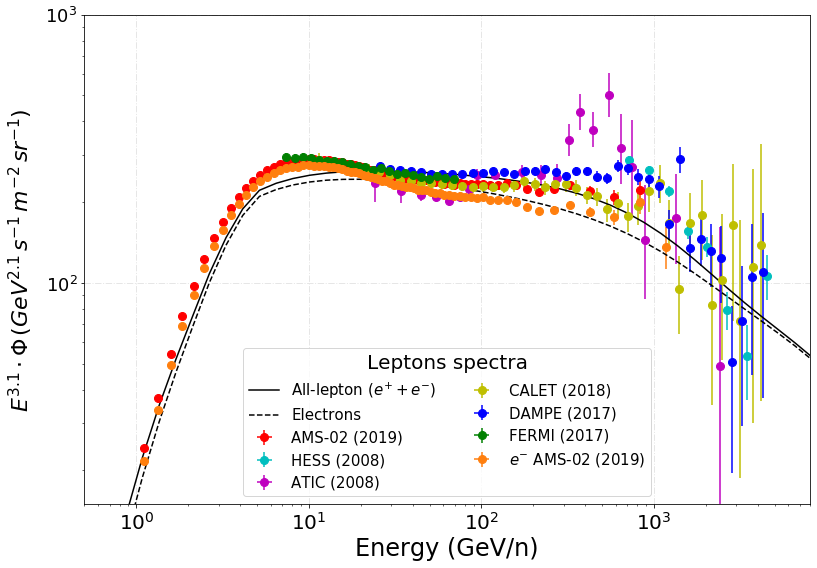

In [22]:
    #####################################      Leptons plot       ###########################################################################

fig1, ax = plt.subplots( figsize=(13,9), edgecolor='blue', facecolor = 'w')

plt.yscale('log')
plt.xscale('log')

slope = 3.1
plt.errorbar(Emeane, fluxe*np.power(Emeane, slope), xerr = [(Emeane-Emeane_low)/Emeane, (Emeane_up-Emeane)/Emeane], yerr = [fluxe_low*np.power(Emeane, slope), fluxe_up*np.power(Emeane, slope)], ms = 8, fmt= 'ro', label = r"AMS-02 (2019)")

plt.errorbar(EmeanHE, fluxHE*np.power(EmeanHE, slope), xerr = [(EmeanHE-EmeanHE_low)/EmeanHE, (EmeanHE_up-EmeanHE)/EmeanHE], yerr = [fluxHE_low*np.power(EmeanHE, slope), fluxHE_up*np.power(EmeanHE, slope)], ms = 8, fmt= 'co', label = r"HESS (2008)")

plt.errorbar(EmeaneA, fluxeA*np.power(EmeaneA, slope), xerr = [(EmeaneA-EmeaneA_low)/EmeaneA, (EmeaneA_up-EmeaneA)/EmeaneA], yerr = [fluxeA_low*np.power(EmeaneA, slope), fluxeA_up*np.power(EmeaneA, slope)], ms = 8, fmt= 'mo', label = r"ATIC (2008)")

plt.errorbar(EmeaneC, fluxeC*np.power(EmeaneC, slope), xerr = [(EmeaneC-EmeaneC_low)/EmeaneC, (EmeaneC_up-EmeaneC)/EmeaneC], yerr = [fluxeC_low*np.power(EmeaneC, slope), fluxeC_up*np.power(EmeaneC, slope)], ms = 8, fmt= 'yo', label = r"CALET (2018)")

plt.errorbar(EmeaneD, fluxeD*np.power(EmeaneD, slope), xerr = [(EmeaneD-EmeaneD_low)/EmeaneD, (EmeaneD_up-EmeaneD)/EmeaneD], yerr = [fluxeD_low*np.power(EmeaneD, slope), fluxeD_up*np.power(EmeaneD, slope)], ms = 8, fmt= 'bo', label = r"DAMPE (2017)")

plt.errorbar(EmeaneF, fluxeF*np.power(EmeaneF, slope), xerr = [(EmeaneF-EmeaneF_low)/EmeaneF, (EmeaneF_up-EmeaneF)/EmeaneF], yerr = [fluxeF_low*np.power(EmeaneF, slope), fluxeF_up*np.power(EmeaneF, slope)], ms = 8, fmt= 'go', label = r"FERMI (2017)")

plt.plot(E, CR.modul(E, table_lep, 1, 1, phi_ams)*np.power(E, slope), "k-", label = "All-lepton $(e^{+} + e^{-})$") 

plt.errorbar(Emeanem, fluxem*np.power(Emeanem, slope), xerr = [(Emeanem-Emeanem_low)/Emeanem, (Emeanem_up-Emeanem)/Emeanem], yerr = [fluxem_low*np.power(Emeanem, slope), fluxem_up*np.power(Emeanem, slope)], ms = 8, fmt= 'C1o', label = r"$e^{-}$ AMS-02 (2019)")
plt.plot(E, CR.modul(E, table_e, 1, 1, phi_ams)*np.power(E, slope), "k--", label = "Electrons") 

lg = ax.legend(fontsize = 15, loc = 0, ncol = 2, title = 'Leptons spectra')
lg.get_title().set_fontsize(20)

ax.set_ylabel(r"$E^{3.1} \cdot \Phi \, (GeV^{2.1} \, s^{-1} \, m^{-2} \, sr^{-1})$", fontsize = 22, labelpad = 10)
ax.set_xlabel("Energy (GeV/n)", fontsize = 24)
ax.set_xlim(left = 0.5, right = 8e3)
ax.set_ylim(bottom = 15, top = 1e3) 
ax.grid(color = '0.9', linestyle='-.', linewidth=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)

#plt.savefig("/mnt/c/Users/pedro/OneDrive/Escritorio/Lept_spectrum.png")
#plt.savefig("/mnt/c/Users/pedro/OneDrive/Escritorio/Lept_spectrum.pdf")
plt.show()
plt.close()

# POSITRONS

In [23]:
data = datfolder + 'e+_AMS_PRL2019.txt'
Emeanp, Emeanp_low, Emeanp_up = np.loadtxt(data,skiprows=0,usecols=(0, 1,2),unpack=True)
fluxp, fluxp_low, fluxp_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5),unpack=True)

data = datfolder + 'pos_Fermi_2012.txt'
EmeanpF, EmeanpF_low, EmeanpF_up = np.loadtxt(data,skiprows=0,usecols=(0, 1,2),unpack=True)
fluxpF, fluxpF_low, fluxpF_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5),unpack=True)

data = datfolder + 'pos_PAM_2013.txt'
EmeanpP, EmeanpP_low, EmeanpP_up = np.loadtxt(data,skiprows=0,usecols=(0, 1,2),unpack=True)
fluxpP, fluxpP_low, fluxpP_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5),unpack=True)

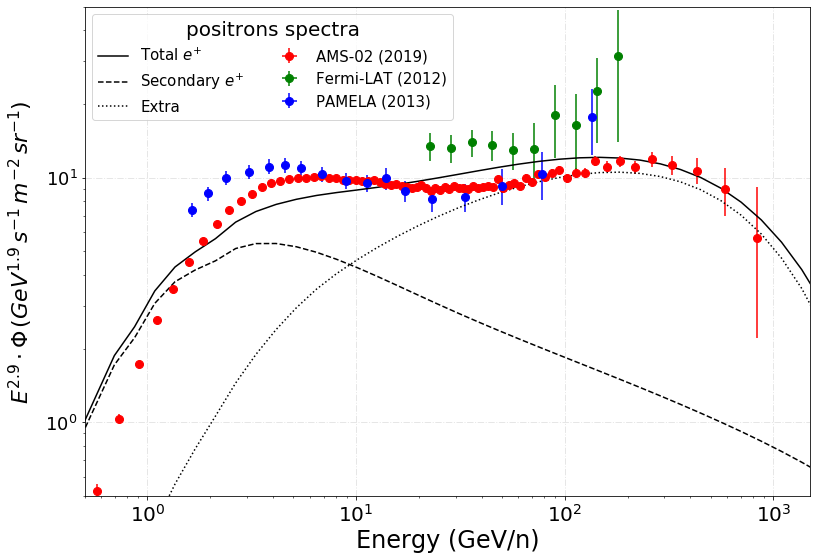

In [24]:
    #####################################      positrons plot       ###########################################################################

fig1, ax = plt.subplots( figsize=(13,9), edgecolor='blue', facecolor = 'w')

plt.yscale('log')
plt.xscale('log')

slope = 2.9
plt.errorbar(Emeanp, fluxp*np.power(Emeanp, slope), xerr = [(Emeanp-Emeanp_low)/Emeanp, (Emeanp_up-Emeanp)/Emeanp], yerr = [fluxp_low*np.power(Emeanp, slope), fluxp_up*np.power(Emeanp, slope)], ms = 8, fmt= 'ro', label = r"AMS-02 (2019)")
plt.errorbar(EmeanpF, fluxpF*np.power(EmeanpF, slope), xerr = [(EmeanpF-EmeanpF_low)/EmeanpF, (EmeanpF_up-EmeanpF)/EmeanpF], yerr = [fluxpF_low*np.power(EmeanpF, slope), fluxpF_up*np.power(EmeanpF, slope)], ms = 8, fmt= 'go', label = r"Fermi-LAT (2012)")
plt.errorbar(EmeanpP, fluxpP*np.power(EmeanpP, slope), xerr = [(EmeanpP-EmeanpP_low)/EmeanpP, (EmeanpP_up-EmeanpP)/EmeanpP], yerr = [fluxpP_low*np.power(EmeanpP, slope), fluxpP_up*np.power(EmeanpP, slope)], ms = 8, fmt= 'bo', label = r"PAMELA (2013)")

plt.plot(E, CR.modul(E, np.array(table_pos[0]) + np.array(table_extra), 1, 1, phi_ams)*np.power(E, slope), "k-", label = "Total $e^{+}$") 
plt.plot(E, CR.modul(E, table_pos[0], 1, 1, phi_ams)*np.power(E, slope), "k--", label = "Secondary $e^{+}$") 
plt.plot(E, CR.modul(E, table_extra, 1, 1, phi_ams)*np.power(E, slope), "k:", label = "Extra") 

lg = ax.legend(fontsize = 15, loc = 0, ncol = 2, title = 'positrons spectra')
lg.get_title().set_fontsize(20)

ax.set_ylabel(r"$E^{2.9} \cdot \Phi \, (GeV^{1.9} \, s^{-1} \, m^{-2} \, sr^{-1})$", fontsize = 22, labelpad = 10)
ax.set_xlabel("Energy (GeV/n)", fontsize = 24)
ax.set_xlim(left = 0.5, right = 1.5e3)
ax.set_ylim(bottom = 0.5, top = 50) 
ax.grid(color = '0.9', linestyle='-.', linewidth=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)

#plt.savefig("/mnt/c/Users/pedro/OneDrive/Escritorio/Pos_spectrum.png")
#plt.savefig("/mnt/c/Users/pedro/OneDrive/Escritorio/Pos_spectrum.pdf")
plt.show()
plt.close()

# POSITRON FRACTION

In [25]:
#Ratio e+/(e+ + e-)
data = datfolder + 'posfrac_AMS_2019.txt'
Emeanp, Emeanp_low, Emeanp_up = np.loadtxt(data,skiprows=0,usecols=(0, 1,2),unpack=True)
fluxp, fluxp_low, fluxp_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5),unpack=True)

data = datfolder + 'posfrac_Fermi_2012.txt'
EmeanpF, EmeanpF_low, EmeanpF_up = np.loadtxt(data,skiprows=0,usecols=(0, 1,2),unpack=True)
fluxpF, fluxpF_low, fluxpF_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5),unpack=True)

data = datfolder + 'posfrac_PAM_2013.txt'
EmeanpP, EmeanpP_low, EmeanpP_up = np.loadtxt(data,skiprows=0,usecols=(0, 1,2),unpack=True)
fluxpP, fluxpP_low, fluxpP_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5),unpack=True)

data = datfolder + 'posfrac_AMS_2014.txt'
EmeanpO, EmeanpO_low, EmeanpO_up = np.loadtxt(data,skiprows=0,usecols=(0, 1,2),unpack=True)
fluxpO, fluxpO_low, fluxpO_up = np.loadtxt(data,skiprows=0,usecols=(3, 4, 5),unpack=True)

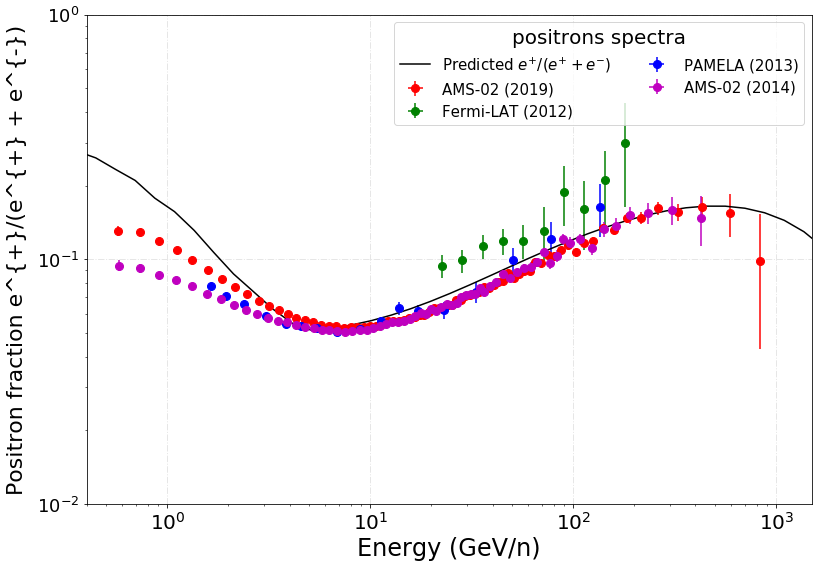

In [27]:
    #####################################      Leptons fraction ratio plot       ###########################################################################

fig1, ax = plt.subplots( figsize=(13,9), edgecolor='blue', facecolor = 'w')

plt.yscale('log')
plt.xscale('log')

plt.errorbar(Emeanp, fluxp, xerr = [(Emeanp-Emeanp_low)/Emeanp, (Emeanp_up-Emeanp)/Emeanp], yerr = [fluxp_low, fluxp_up], ms = 8, fmt= 'ro', label = r"AMS-02 (2019)")
plt.errorbar(EmeanpF, fluxpF, xerr = [(EmeanpF-EmeanpF_low)/EmeanpF, (EmeanpF_up-EmeanpF)/EmeanpF], yerr = [fluxpF_low, fluxpF_up], ms = 8, fmt= 'go', label = r"Fermi-LAT (2012)")
plt.errorbar(EmeanpP, fluxpP, xerr = [(EmeanpP-EmeanpP_low)/EmeanpP, (EmeanpP_up-EmeanpP)/EmeanpP], yerr = [fluxpP_low, fluxpP_up], ms = 8, fmt= 'bo', label = r"PAMELA (2013)")
plt.errorbar(EmeanpO, fluxpO, xerr = [(EmeanpO-EmeanpO_low)/EmeanpO, (EmeanpO_up-EmeanpO)/EmeanpO], yerr = [fluxpO_low, fluxpO_up], ms = 8, fmt= 'mo', label = r"AMS-02 (2014)")

pos = CR.modul(E, table_pos[0] + table_extra, 1, 1, phi_ams)
elec = CR.modul(E, table_e, 1, 1, phi_ams)
plt.plot(E, pos/(elec + pos), "k-", label = "Predicted $e^{+}/(e^{+} + e^{-})$") 

lg = ax.legend(fontsize = 15, loc = 0, ncol = 2, title = 'positrons spectra')
lg.get_title().set_fontsize(20)

ax.set_ylabel(r"Positron fraction e^{+}/(e^{+} + e^{-})", fontsize = 22, labelpad = 10)
ax.set_xlabel("Energy (GeV/n)", fontsize = 24)
ax.set_xlim(left = 0.4, right = 1.5e3)
ax.set_ylim(bottom = 1.e-2, top = 1) 
ax.grid(color = '0.9', linestyle='-.', linewidth=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)

#plt.savefig("/mnt/c/Users/pedro/OneDrive/Escritorio/Frac_spectrum.png")
#plt.savefig("/mnt/c/Users/pedro/OneDrive/Escritorio/Frac_spectrum.pdf")
plt.show()
plt.close()